<a href="https://colab.research.google.com/github/lazy-wolf/python-class-notes/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 1**

```
# Authoured by: Wasim Dawood Shaik
# UNB ID: 3744476
# Date: 05-10-2023
```








**Import Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from google.colab import drive
from sklearn.metrics import accuracy_score

**Mounting Google Drive in Google Colab**

In [52]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Load custom images from Google Drive**

In [53]:
# Load custom images from Google Drive
custom_images = []
custom_labels = []
base_folder_path = '/content/drive/MyDrive/TME_6015/Assignment_1'
for folder_name in os.listdir(base_folder_path):
    folder_path = os.path.join(base_folder_path, folder_name)
    print(folder_path)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
          print('filename', filename)
          if filename.endswith('.png') or filename.endswith('.PNG') or filename.endswith('.JPG') or filename.endswith('.jpg'):
              img_path = os.path.join(folder_path, filename)
              img = Image.open(img_path).convert('L')  # convert image to grayscale
              img = img.resize((28, 28))  # resize image to match MNIST data
              img = img.rotate(-90)
              threshold = 100
              img = img.point(lambda p: p > threshold and 255)
              img_array = np.array(img)
              custom_images.append(img_array)
              custom_labels.append(int(folder_name))  # use folder name as label

# Convert the list of custom images and labels to numpy arrays
custom_images = np.array(custom_images)
custom_labels = np.array(custom_labels)

# Preprocess the custom images
custom_images = custom_images / 255.0

/content/drive/MyDrive/TME_6015/Assignment_1/7
filename 7-1.jpg
filename 7-2.png
filename 7-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/1
filename 1-1.jpg
filename 1-2.png
filename 1-3`.png
/content/drive/MyDrive/TME_6015/Assignment_1/2
filename 2-1.jpg
filename 2-2.png
filename 2-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/3
filename 3-1.jpg
filename 3-2.png
filename 3-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/4
filename 4-1.jpg
filename 4-2.png
filename 4-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/5
filename 5-1.jpg
filename 5-2.png
filename 5-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/6
filename 6-1.jpg
filename 6-2.png
filename 6-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/8
filename 8-1.jpg
filename 8-2.png
filename 8-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/9
filename 9-1.jpg
filename 9-2.png
filename 9-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/0
filename 0-1.jpg
filename 0-2.png
filename 0-3.png


In [54]:
display_image = custom_images[2] * 255

# Convert the image data to uint8
display_image = display_image.astype(np.uint8)

# Create a PIL image
img = Image.fromarray(display_image)

# Display the image
img

**Plotting the data**

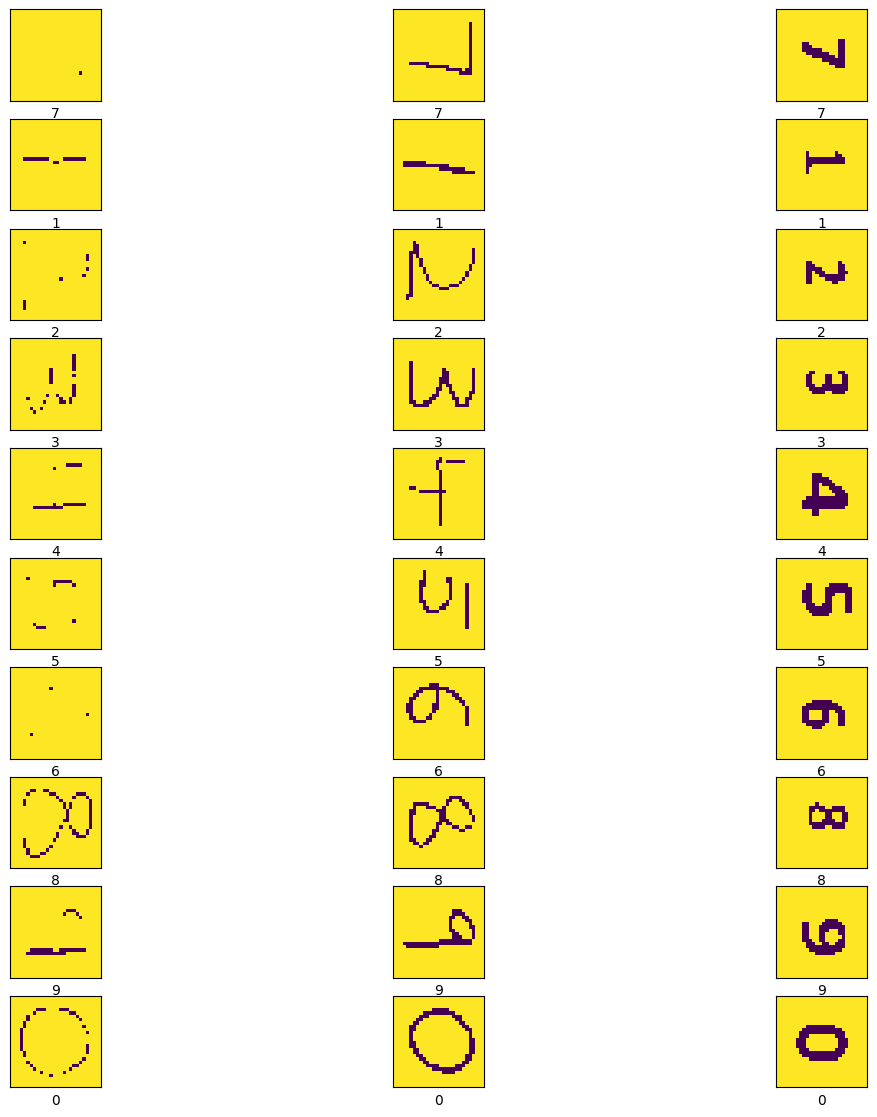

In [55]:
plt.figure(figsize=(14,14))
for i in range(30):
    plt.subplot(10,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(custom_images[i])
    plt.xlabel(custom_labels[i])
plt.show()

**Load and Preprocess MNIST Dataset**

In [56]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

**Adding the custom images and labels to the original MNIST dataset**

In [57]:
# Add the custom images and labels to the original MNIST dataset
x_train = np.concatenate((x_train, custom_images), axis=0)
y_train = np.concatenate((y_train, custom_labels), axis=0)

In [58]:
display_image = x_train[0] * 255

# Convert the image data to uint8
display_image = display_image.astype(np.uint8)

# Create a PIL image
img = Image.fromarray(display_image)
img

**Create a Model**

In [59]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [60]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_6 (Flatten)         (None, 576)              

**Compile and Train the Model**

In [61]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1876/1876 [==============================] - 62s 32ms/step - loss: 0.1459 - accuracy: 0.9554 - val_loss: 0.0463 - val_accuracy: 0.9845
Epoch 2/10
1876/1876 [==============================] - 60s 32ms/step - loss: 0.0472 - accuracy: 0.9853 - val_loss: 0.0356 - val_accuracy: 0.9882
Epoch 3/10
1876/1876 [==============================] - 58s 31ms/step - loss: 0.0332 - accuracy: 0.9897 - val_loss: 0.0348 - val_accuracy: 0.9895
Epoch 4/10
1876/1876 [==============================] - 62s 33ms/step - loss: 0.0274 - accuracy: 0.9912 - val_loss: 0.0292 - val_accuracy: 0.9899
Epoch 5/10
1876/1876 [==============================] - 60s 32ms/step - loss: 0.0207 - accuracy: 0.9933 - val_loss: 0.0296 - val_accuracy: 0.9904
Epoch 6/10
1876/1876 [==============================] - 59s 31ms/step - loss: 0.0158 - accuracy: 0.9951 - val_loss: 0.0370 - val_accuracy: 0.9906
Epoch 7/10
1876/1876 [==============================] - 61s 32ms/step - loss: 0.0149 - accuracy: 0.9952 - val_loss: 0.0315 -

**Plot Training History**

313/313 - 2s - loss: 0.0436 - accuracy: 0.9895 - 2s/epoch - 7ms/step


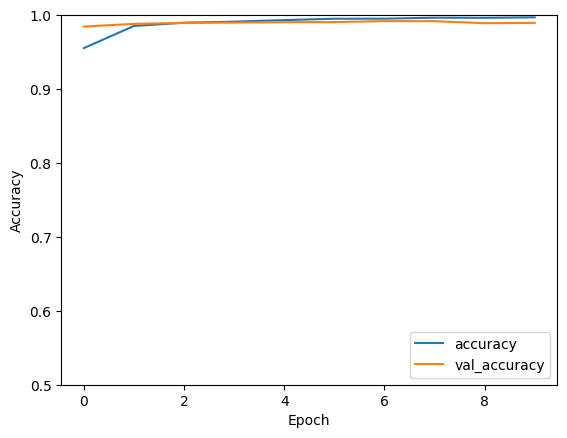

In [62]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [63]:
print(test_acc)

0.9894999861717224


**Detect Overfitting**

---

We will Train the model for more epochs until you observe overfitting in the training data (i.e., when validation accuracy starts decreasing while training accuracy keeps increasing).

---

Here we will run two models to check overffitting on them. First model has less parameters compared to the next one.



**Model -1**

In [64]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [65]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 5408)              0         
                                                                 
 dense_14 (Dense)            (None, 64)                346176    
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 347146 (1.32 MB)
Trainable params: 347146 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [66]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [67]:
history = model.fit(x_train, y_train, epochs=25,
                    validation_data=(x_test, y_test))

Epoch 1/25
1876/1876 [==============================] - 35s 18ms/step - loss: 0.1655 - accuracy: 0.9523 - val_loss: 0.0631 - val_accuracy: 0.9796
Epoch 2/25
1876/1876 [==============================] - 34s 18ms/step - loss: 0.0568 - accuracy: 0.9826 - val_loss: 0.0585 - val_accuracy: 0.9817
Epoch 3/25
1876/1876 [==============================] - 35s 19ms/step - loss: 0.0382 - accuracy: 0.9883 - val_loss: 0.0547 - val_accuracy: 0.9824
Epoch 4/25
1876/1876 [==============================] - 33s 18ms/step - loss: 0.0285 - accuracy: 0.9914 - val_loss: 0.0419 - val_accuracy: 0.9858
Epoch 5/25
1876/1876 [==============================] - 35s 18ms/step - loss: 0.0204 - accuracy: 0.9935 - val_loss: 0.0501 - val_accuracy: 0.9848
Epoch 6/25
1876/1876 [==============================] - 34s 18ms/step - loss: 0.0136 - accuracy: 0.9957 - val_loss: 0.0425 - val_accuracy: 0.9854
Epoch 7/25
1876/1876 [==============================] - 32s 17ms/step - loss: 0.0104 - accuracy: 0.9966 - val_loss: 0.0490 -

**At 11 Epoch, We can see the validation accuracy has reached its peak of 98.9 percent then it decreases from that value. This shows that the model overfitted at 11 Epoch**

313/313 - 1s - loss: 0.0661 - accuracy: 0.9888 - 1s/epoch - 4ms/step


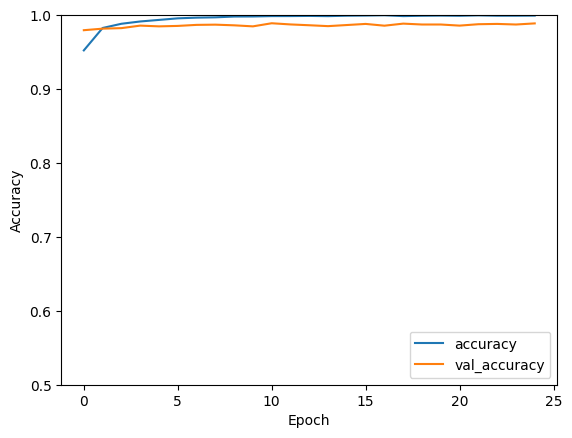

In [68]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [69]:
print(test_acc)

0.9887999892234802


**Model - 2**

In [70]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [71]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_8 (Flatten)         (None, 576)              

In [72]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [73]:
history = model.fit(x_train, y_train, epochs=18,
                    validation_data=(x_test, y_test))

Epoch 1/18
1876/1876 [==============================] - 65s 33ms/step - loss: 0.1565 - accuracy: 0.9504 - val_loss: 0.0432 - val_accuracy: 0.9872
Epoch 2/18
1876/1876 [==============================] - 59s 31ms/step - loss: 0.0477 - accuracy: 0.9853 - val_loss: 0.0371 - val_accuracy: 0.9877
Epoch 3/18
1876/1876 [==============================] - 61s 32ms/step - loss: 0.0350 - accuracy: 0.9891 - val_loss: 0.0368 - val_accuracy: 0.9879
Epoch 4/18
1876/1876 [==============================] - 58s 31ms/step - loss: 0.0273 - accuracy: 0.9913 - val_loss: 0.0350 - val_accuracy: 0.9887
Epoch 5/18
1876/1876 [==============================] - 59s 31ms/step - loss: 0.0228 - accuracy: 0.9931 - val_loss: 0.0288 - val_accuracy: 0.9913
Epoch 6/18
1876/1876 [==============================] - 58s 31ms/step - loss: 0.0162 - accuracy: 0.9945 - val_loss: 0.0337 - val_accuracy: 0.9912
Epoch 7/18
1876/1876 [==============================] - 60s 32ms/step - loss: 0.0142 - accuracy: 0.9950 - val_loss: 0.0337 -

**At 15 Epoch, We can see the validation accuracy has reached its peak of 99.3 percent then it decreases from that value. This shows that the model overfitted at 15 Epoch**

313/313 - 2s - loss: 0.0414 - accuracy: 0.9916 - 2s/epoch - 7ms/step


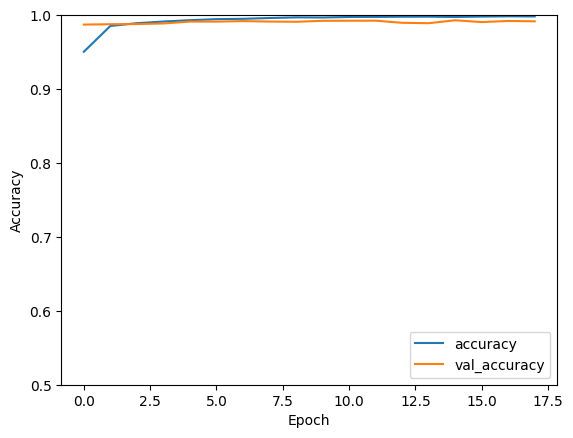

In [74]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [75]:
print(test_acc)

0.991599977016449


**Experiment with Different Configurationst**

**Model - 1**

In [76]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [77]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 5408)              0         
                                                                 
 dense_18 (Dense)            (None, 64)                346176    
                                                                 
 dense_19 (Dense)            (None, 10)                650       
                                                                 
Total params: 347146 (1.32 MB)
Trainable params: 347146 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [78]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [79]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1876/1876 [==============================] - 36s 19ms/step - loss: 0.1678 - accuracy: 0.9501 - val_loss: 0.0676 - val_accuracy: 0.9794
Epoch 2/10
1876/1876 [==============================] - 33s 18ms/step - loss: 0.0589 - accuracy: 0.9820 - val_loss: 0.0593 - val_accuracy: 0.9805
Epoch 3/10
1876/1876 [==============================] - 35s 19ms/step - loss: 0.0393 - accuracy: 0.9878 - val_loss: 0.0565 - val_accuracy: 0.9826
Epoch 4/10
1876/1876 [==============================] - 36s 19ms/step - loss: 0.0284 - accuracy: 0.9913 - val_loss: 0.0418 - val_accuracy: 0.9854
Epoch 5/10
1876/1876 [==============================] - 37s 20ms/step - loss: 0.0203 - accuracy: 0.9933 - val_loss: 0.0611 - val_accuracy: 0.9809
Epoch 6/10
1876/1876 [==============================] - 38s 20ms/step - loss: 0.0140 - accuracy: 0.9953 - val_loss: 0.0516 - val_accuracy: 0.9832
Epoch 7/10
1876/1876 [==============================] - 34s 18ms/step - loss: 0.0115 - accuracy: 0.9961 - val_loss: 0.0579 -

**Curve - 1**

313/313 - 2s - loss: 0.0540 - accuracy: 0.9861 - 2s/epoch - 7ms/step


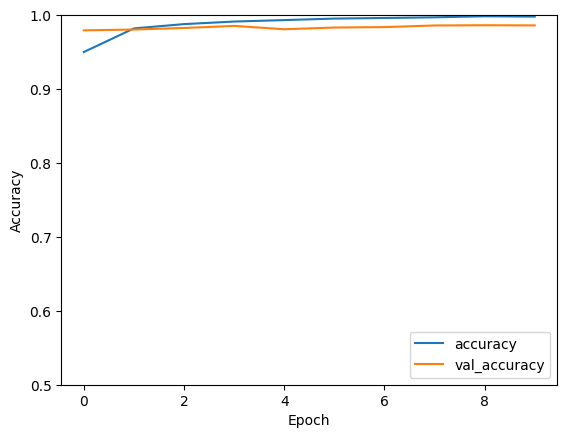

In [80]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [81]:
print(test_acc)

0.9861000180244446


**Model - 2**

In [82]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [83]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 flatten_10 (Flatten)        (None, 7744)              0         
                                                                 
 dense_20 (Dense)            (None, 64)                495680    
                                                                 
 dense_21 (Dense)            (None, 10)                650       
                                                     

In [84]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [85]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1876/1876 [==============================] - 69s 36ms/step - loss: 0.1249 - accuracy: 0.9614 - val_loss: 0.0504 - val_accuracy: 0.9829
Epoch 2/10
1876/1876 [==============================] - 63s 34ms/step - loss: 0.0424 - accuracy: 0.9869 - val_loss: 0.0362 - val_accuracy: 0.9873
Epoch 3/10
1876/1876 [==============================] - 62s 33ms/step - loss: 0.0266 - accuracy: 0.9917 - val_loss: 0.0289 - val_accuracy: 0.9903
Epoch 4/10
1876/1876 [==============================] - 62s 33ms/step - loss: 0.0192 - accuracy: 0.9935 - val_loss: 0.0314 - val_accuracy: 0.9906
Epoch 5/10
1876/1876 [==============================] - 64s 34ms/step - loss: 0.0133 - accuracy: 0.9960 - val_loss: 0.0402 - val_accuracy: 0.9885
Epoch 6/10
1876/1876 [==============================] - 65s 34ms/step - loss: 0.0111 - accuracy: 0.9962 - val_loss: 0.0340 - val_accuracy: 0.9914
Epoch 7/10
1876/1876 [==============================] - 62s 33ms/step - loss: 0.0074 - accuracy: 0.9976 - val_loss: 0.0444 -

**Curve - 2**

313/313 - 4s - loss: 0.0545 - accuracy: 0.9892 - 4s/epoch - 12ms/step


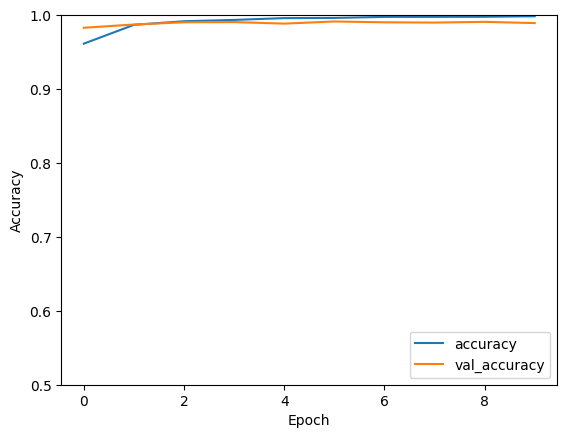

In [86]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [87]:
print(test_acc)

0.9891999959945679


**Model - 3**

In [88]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [89]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_11 (Flatten)        (None, 576)             

In [90]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [91]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1876/1876 [==============================] - 62s 32ms/step - loss: 0.1504 - accuracy: 0.9534 - val_loss: 0.0417 - val_accuracy: 0.9871
Epoch 2/10
1876/1876 [==============================] - 59s 32ms/step - loss: 0.0466 - accuracy: 0.9859 - val_loss: 0.0302 - val_accuracy: 0.9905
Epoch 3/10
1876/1876 [==============================] - 58s 31ms/step - loss: 0.0337 - accuracy: 0.9893 - val_loss: 0.0271 - val_accuracy: 0.9915
Epoch 4/10
1876/1876 [==============================] - 59s 31ms/step - loss: 0.0265 - accuracy: 0.9915 - val_loss: 0.0242 - val_accuracy: 0.9932
Epoch 5/10
1876/1876 [==============================] - 57s 31ms/step - loss: 0.0211 - accuracy: 0.9933 - val_loss: 0.0305 - val_accuracy: 0.9914
Epoch 6/10
1876/1876 [==============================] - 57s 30ms/step - loss: 0.0160 - accuracy: 0.9950 - val_loss: 0.0315 - val_accuracy: 0.9914
Epoch 7/10
1876/1876 [==============================] - 58s 31ms/step - loss: 0.0145 - accuracy: 0.9953 - val_loss: 0.0300 -

**Curve - 3**

313/313 - 2s - loss: 0.0275 - accuracy: 0.9928 - 2s/epoch - 7ms/step


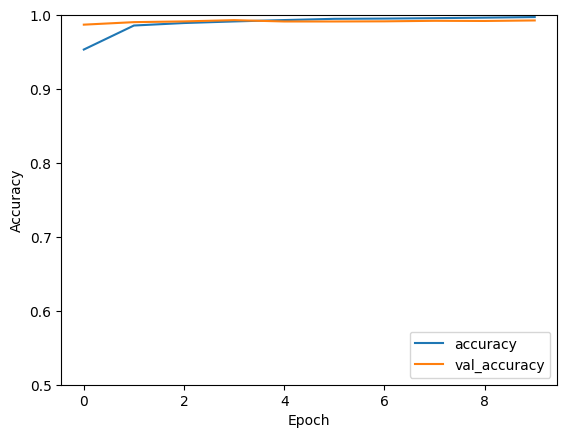

In [92]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [93]:
print(test_acc)

0.9927999973297119


**Create a Custom Test Set**

In [94]:
custom_test_images = []
custom_test_labels = []
folder_path = '/content/drive/MyDrive/TME_6015/Assignment_1_Custom_Test_Data'
for filename in os.listdir(folder_path):
  print('filename : ', filename)
  if filename.endswith('.png') or filename.endswith('.PNG') or filename.endswith('.JPG') or filename.endswith('.jpg') or filename.endswith('.JPEG') or filename.endswith('.jpeg'):
    img_path = os.path.join(folder_path, filename)
    img = Image.open(img_path).convert('L')
    img = img.resize((28, 28))
    threshold = 100
    img = img.point(lambda p: p > threshold and 255)
    img_array = np.array(img)
    custom_test_images.append(img_array)
    custom_test_labels.append(int(filename[0]))

# Convert the list of custom images and labels to numpy arrays
custom_test_images = np.array(custom_test_images)
custom_test_labels = np.array(custom_test_labels)


filename :  1.png
filename :  2.png
filename :  3.png
filename :  4.png
filename :  5.png
filename :  6.png
filename :  7.png
filename :  8.png
filename :  9.png
filename :  0.png


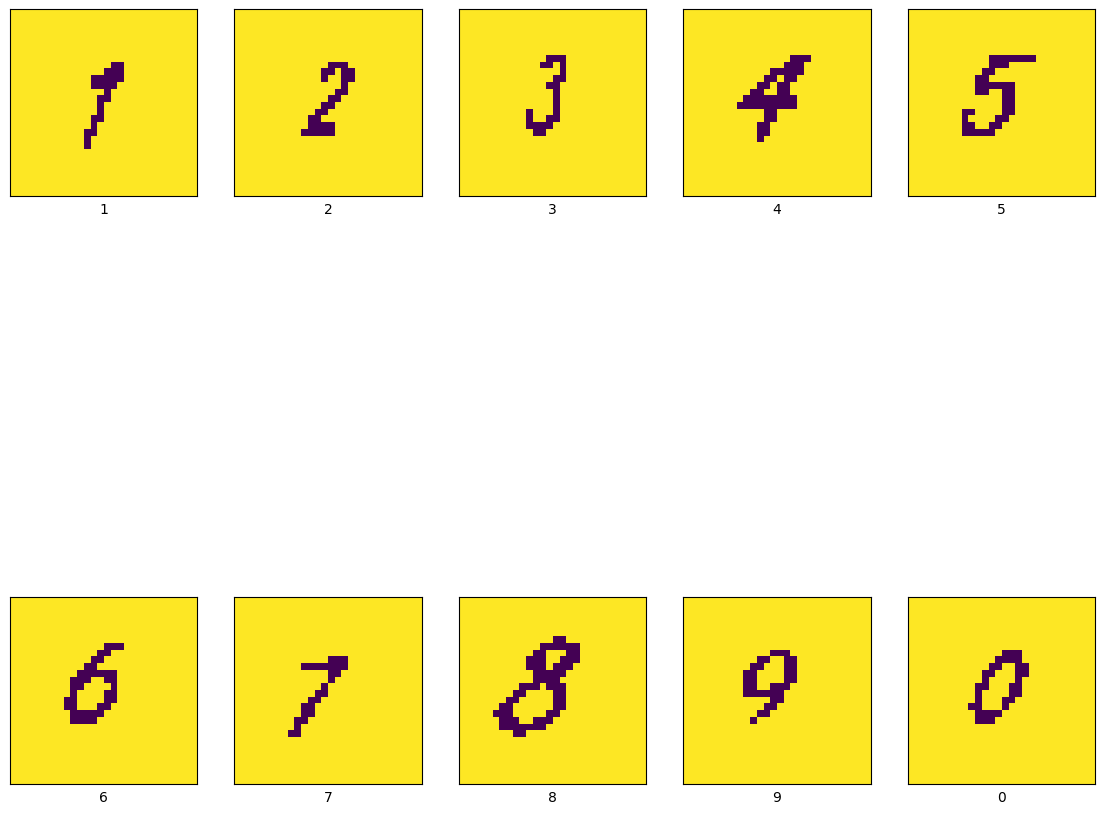

In [95]:
plt.figure(figsize=(14,14))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(custom_test_images[i])
    plt.xlabel(custom_test_labels[i])
plt.show()

In [96]:
custom_test_labels, len(custom_test_labels)

(array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0]), 10)

**Generate Classifications for Custom Test Set**

In [97]:
custom_test_pred=model.predict(custom_test_images)

1/1 [==============================] - 0s 91ms/step


In [98]:
custom_test_pred[0]

array([ -192.34807, -1235.0894 ,   752.1111 ,   374.82346, -1241.9521 ,
       -1149.033  ,  -401.10483, -1623.7148 ,   706.03876, -1603.5377 ],
      dtype=float32)

In [99]:
custom_test_pred=list(map(lambda p: np.argmax(p), custom_test_pred))

**Performance Report**

In [100]:
for i in range(len(custom_test_pred)):
  print(custom_test_labels[i],custom_test_pred[i])

1 2
2 2
3 3
4 6
5 5
6 3
7 3
8 5
9 3
0 3


In [102]:
print("Accuracy Score: ",accuracy_score(custom_test_labels, custom_test_pred)*100)

Accuracy Score:  30.0
